In [12]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from collections import Counter
#import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Info in <ACLiC>: unmodified script has already been compiled and loaded


In [43]:
date = "JUN13"

chainSGN = ROOT.TChain("events")
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1039_GFcat_Phi3Cat_2018.root".format(date))
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)

df = df.Define("D0_Gen_pt", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 421, 423, 25)[0]")\
    .Define("D0_Gen_phi", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 421, 423, 25)[1]")\
    .Define("D0_Gen_eta", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 421, 423, 25)[0]")\
    .Define("D0Star_Gen_pt", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 423, 25)[0]")\
    .Define("D0Star_Gen_phi", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 423, 25)[1]")\
    .Define("D0Star_Gen_eta", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 423, 25)[0]")\
    .Define("Photon_Gen_pt", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)[0]")\
    .Define("Photon_Gen_phi", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)[1]")\
    .Define("Photon_Gen_eta", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)[0]")\
    .Define("DR_Gen", "ROOT::VecOps::DeltaR(D0_Gen_eta, Photon_Gen_eta, D0_Gen_phi, Photon_Gen_phi)")\
    .Define("DR_Reco", "ROOT::VecOps::DeltaR(goodMeson_eta[0], goodPhotons_eta[0], goodMeson_phi[0], goodPhotons_phi[0])")


In [44]:
dfnew = df.Define("Diff_D0_pt", "(goodMeson_pt[0]-D0_Gen_pt)/D0_Gen_pt")\
    .Define("Diff_D0_phi", "(goodMeson_phi[0]-D0_Gen_phi)/D0_Gen_phi")\
    .Define("Diff_D0_eta", "(goodMeson_eta[0]-D0_Gen_eta)/D0_Gen_eta")\
    .Define("Diff_Photon_pt", "(goodPhotons_pt[0]-Photon_Gen_pt)/Photon_Gen_pt")\
    .Define("Diff_Photon_phi", "(goodPhotons_phi[0]-Photon_Gen_phi)/Photon_Gen_phi")\
    .Define("Diff_Photon_eta", "(goodPhotons_eta[0]-Photon_Gen_eta)/Photon_Gen_eta")\
    .Define("Diff_DR", "(DR_Reco-DR_Gen)/DR_Gen")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


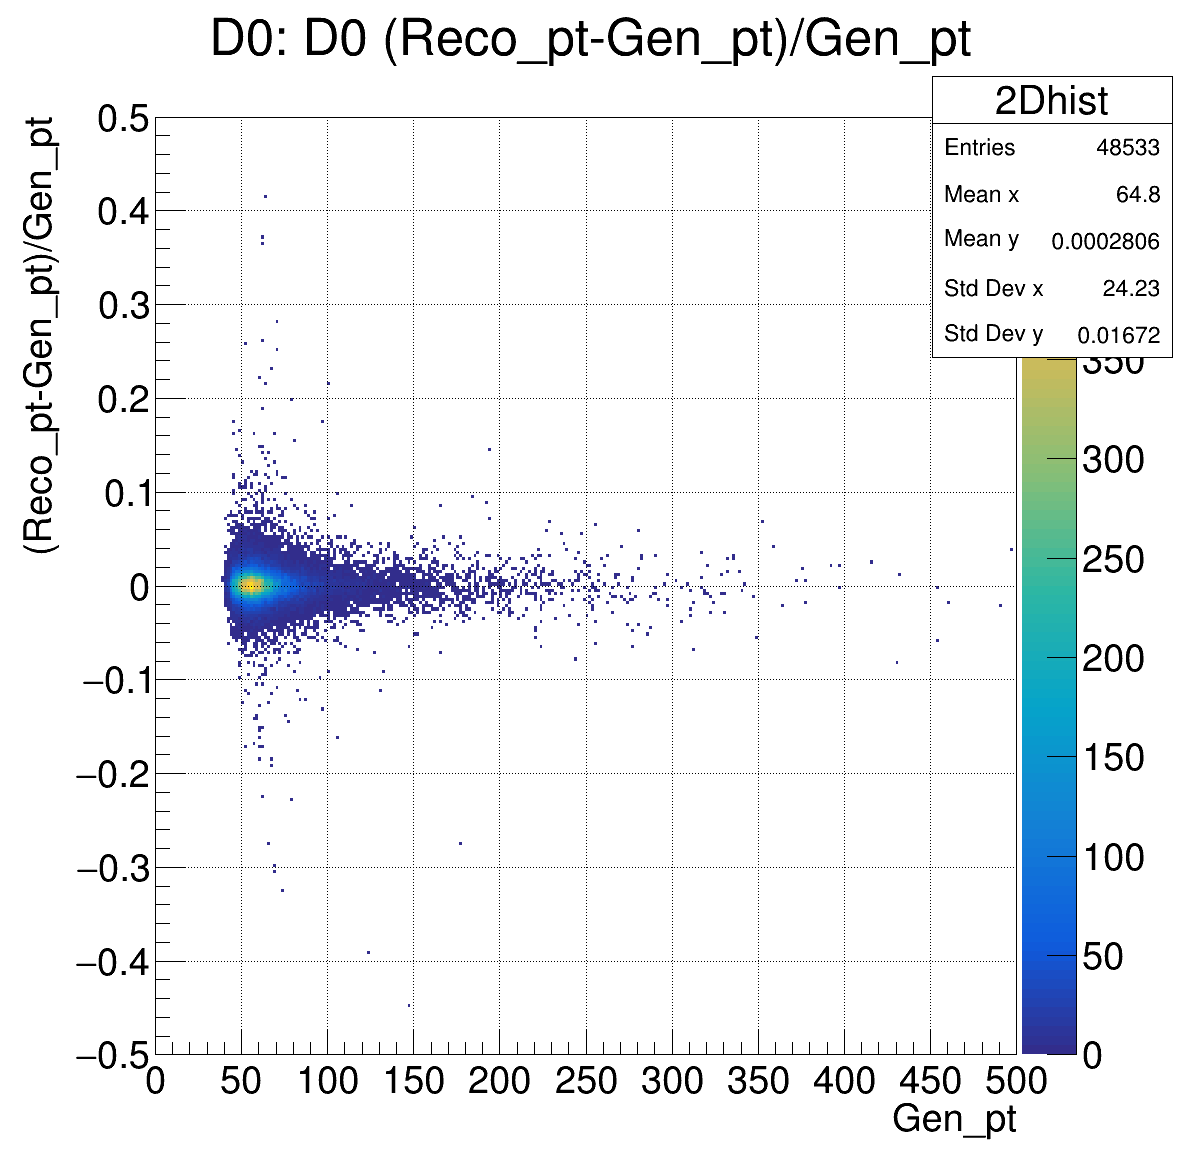

In [17]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 1200)

nbins, xlow, xhigh, ylow, yhigh = 300, 0, 500, -0.5, 0.5

var = "pt"
part = "D0"

h = dfnew.Histo2D(("2Dhist", "D0: {0} (Reco_{1}-Gen_{1})/Gen_{1}".format(part, var),\
                   nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_Gen_{}".format(part, var), "Diff_{}_{}".format(part, var))

h.GetXaxis().SetTitle("Gen_{0}".format(var))
h.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h.GetZaxis().SetTitle("Events")
canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)

h.SetContour(100)
h.Draw("colz")
canvas.SetGrid()

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


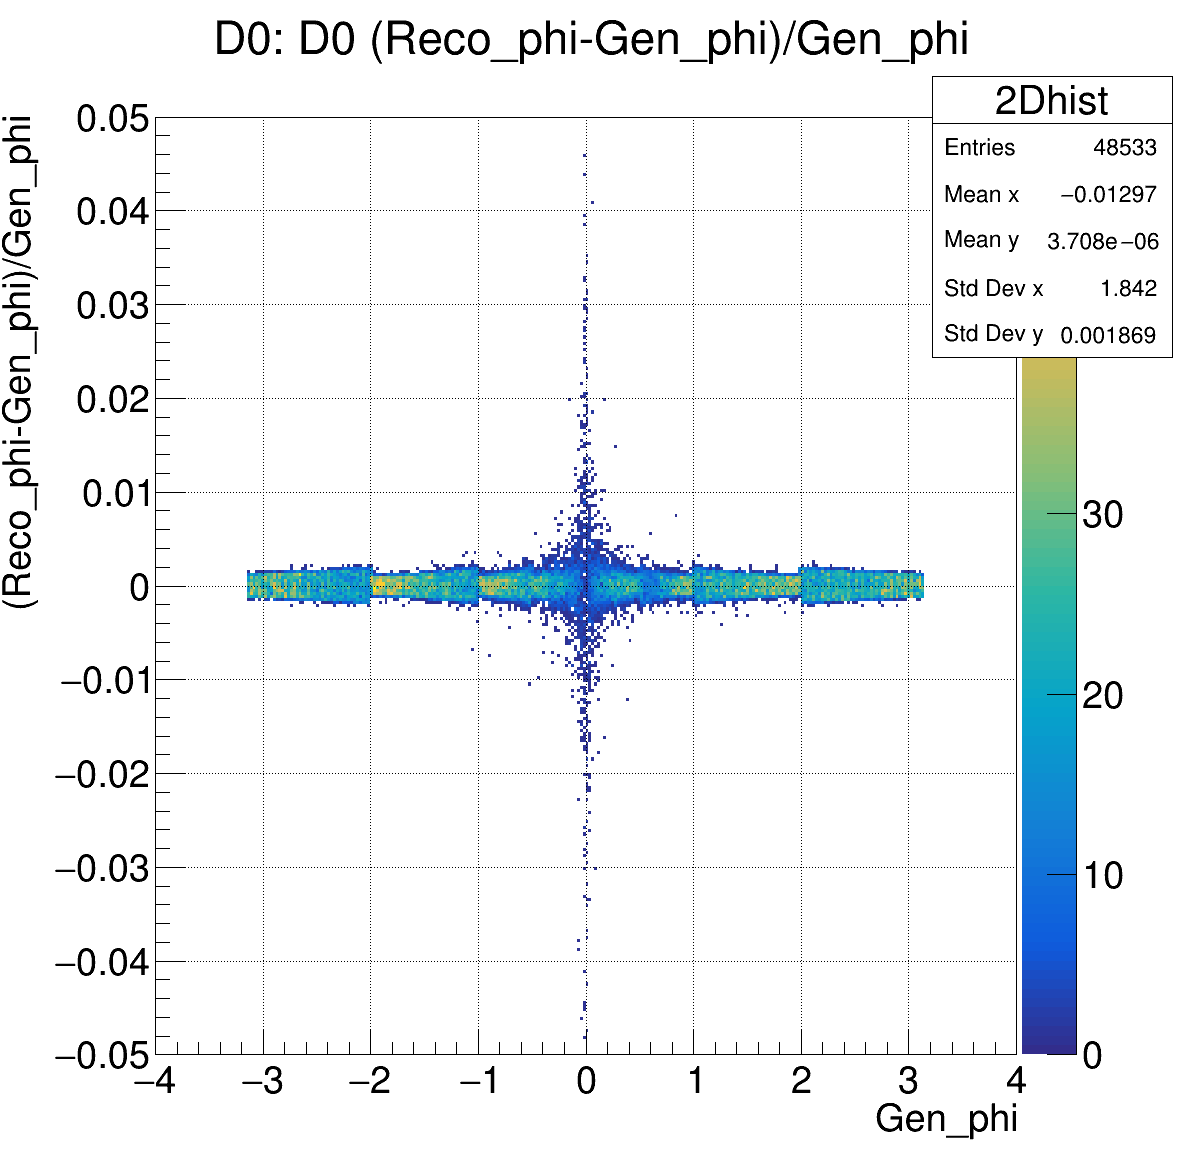

In [21]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 1200)

nbins, xlow, xhigh, ylow, yhigh = 300, -4, 4, -0.05, 0.05

var = "phi"
part = "D0"

h = dfnew.Histo2D(("2Dhist", "D0: {0} (Reco_{1}-Gen_{1})/Gen_{1}".format(part, var),\
                   nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_Gen_{}".format(part, var), "Diff_{}_{}".format(part, var))

h.GetXaxis().SetTitle("Gen_{0}".format(var))
h.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h.GetZaxis().SetTitle("Events")
canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)

h.SetContour(100)
h.Draw("colz")
canvas.SetGrid()

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


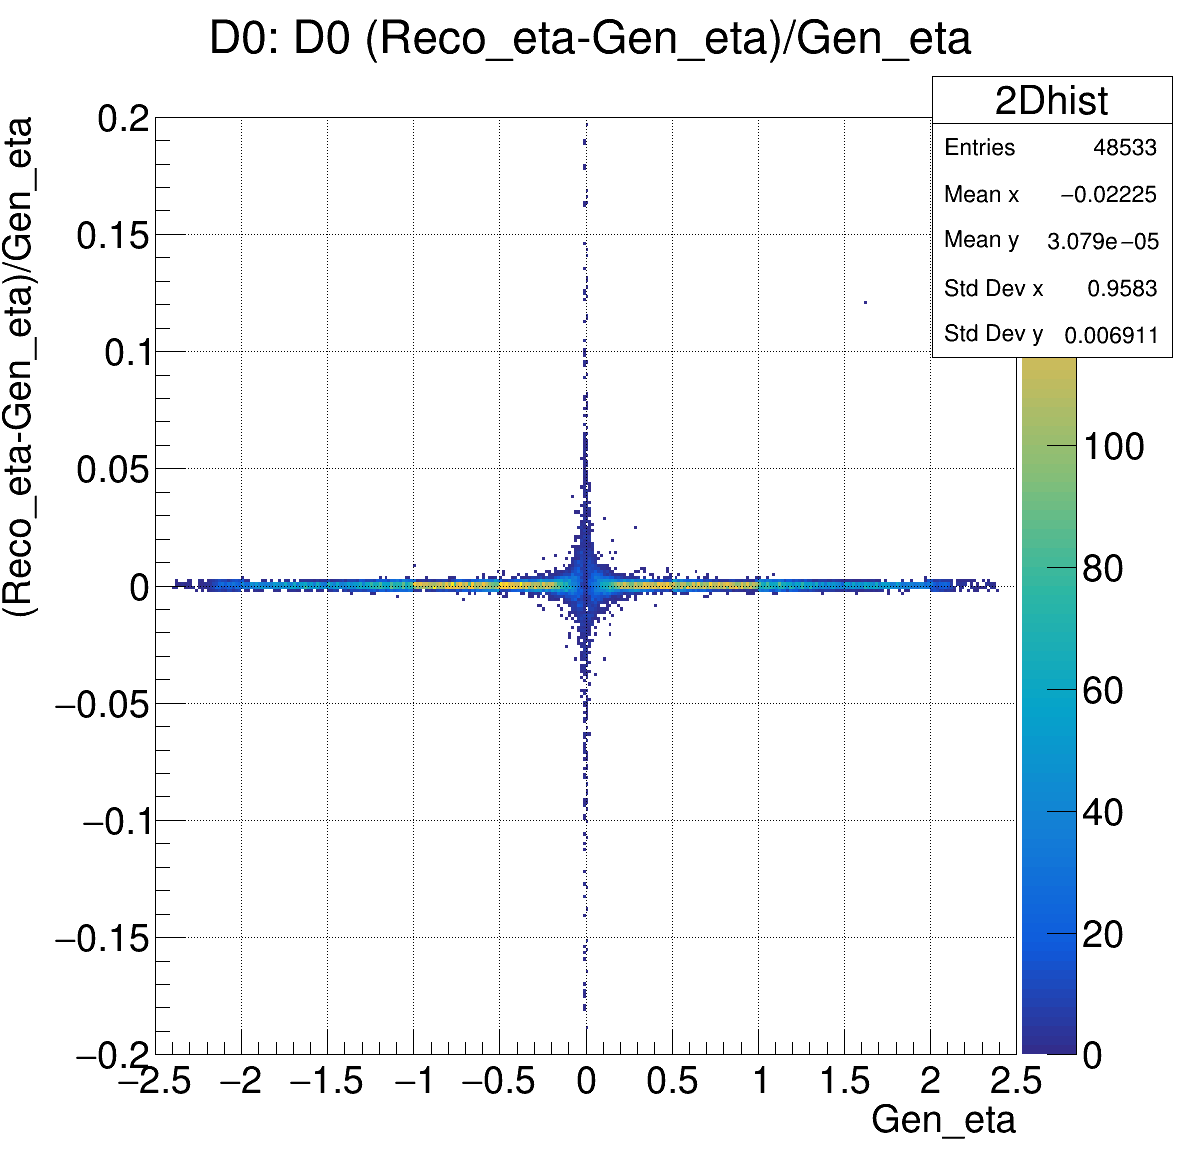

In [27]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 1200)

nbins, xlow, xhigh, ylow, yhigh = 300, -2.5, 2.5, -0.2, 0.2

var = "eta"
part = "D0"

h = dfnew.Histo2D(("2Dhist", "D0: {0} (Reco_{1}-Gen_{1})/Gen_{1}".format(part, var),\
                   nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_Gen_{}".format(part, var), "Diff_{}_{}".format(part, var))

h.GetXaxis().SetTitle("Gen_{0}".format(var))
h.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h.GetZaxis().SetTitle("Events")
canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)

h.SetContour(100)
h.Draw("colz")
canvas.SetGrid()

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


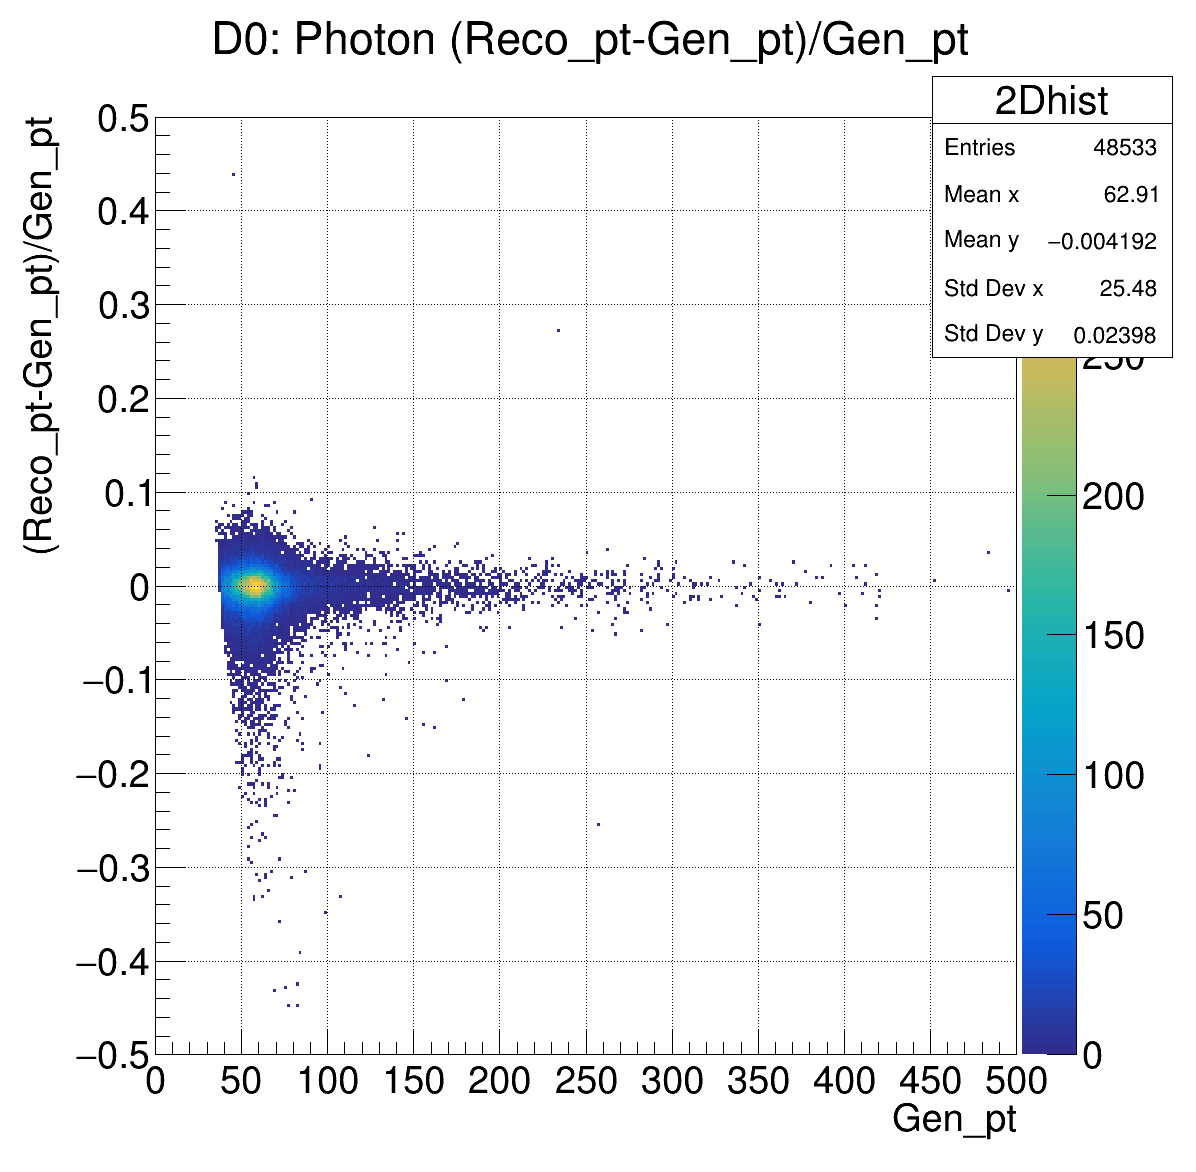

In [36]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 1200)

nbins, xlow, xhigh, ylow, yhigh = 300, 0, 500, -0.5, 0.5

var = "pt"
part = "Photon"

h = dfnew.Histo2D(("2Dhist", "D0: {0} (Reco_{1}-Gen_{1})/Gen_{1}".format(part, var),\
                   nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_Gen_{}".format(part, var), "Diff_{}_{}".format(part, var))

h.GetXaxis().SetTitle("Gen_{0}".format(var))
h.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h.GetZaxis().SetTitle("Events")
canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)

h.SetContour(100)
h.Draw("colz")
canvas.SetGrid()

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


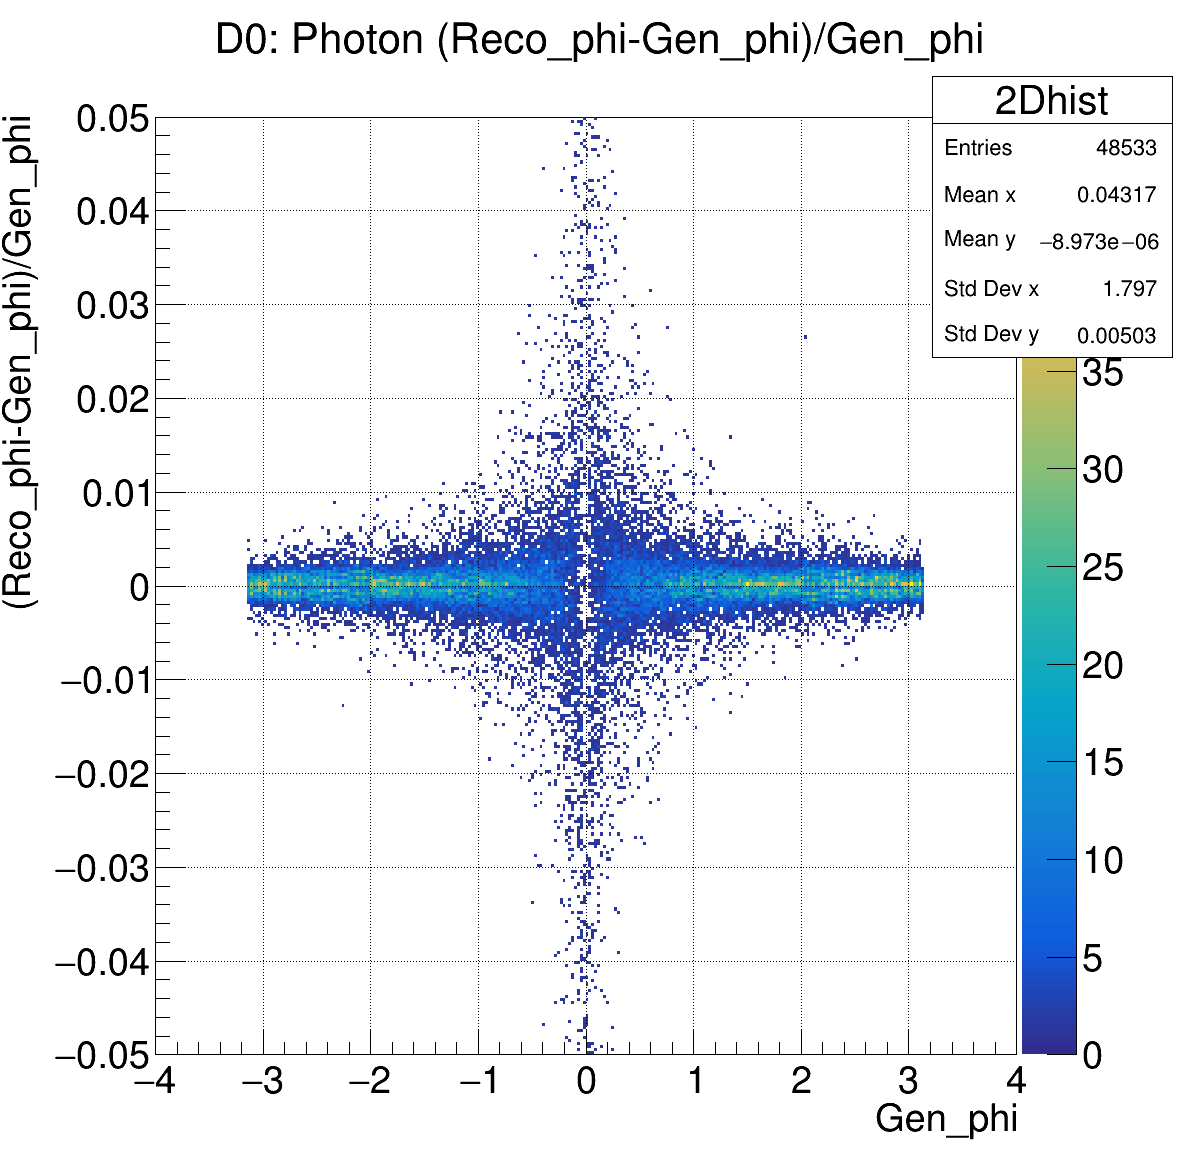

In [37]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 1200)

nbins, xlow, xhigh, ylow, yhigh = 300, -4, 4, -0.05, 0.05

var = "phi"
part = "Photon"

h = dfnew.Histo2D(("2Dhist", "D0: {0} (Reco_{1}-Gen_{1})/Gen_{1}".format(part, var),\
                   nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_Gen_{}".format(part, var), "Diff_{}_{}".format(part, var))

h.GetXaxis().SetTitle("Gen_{0}".format(var))
h.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h.GetZaxis().SetTitle("Events")
canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)

h.SetContour(100)
h.Draw("colz")
canvas.SetGrid()

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


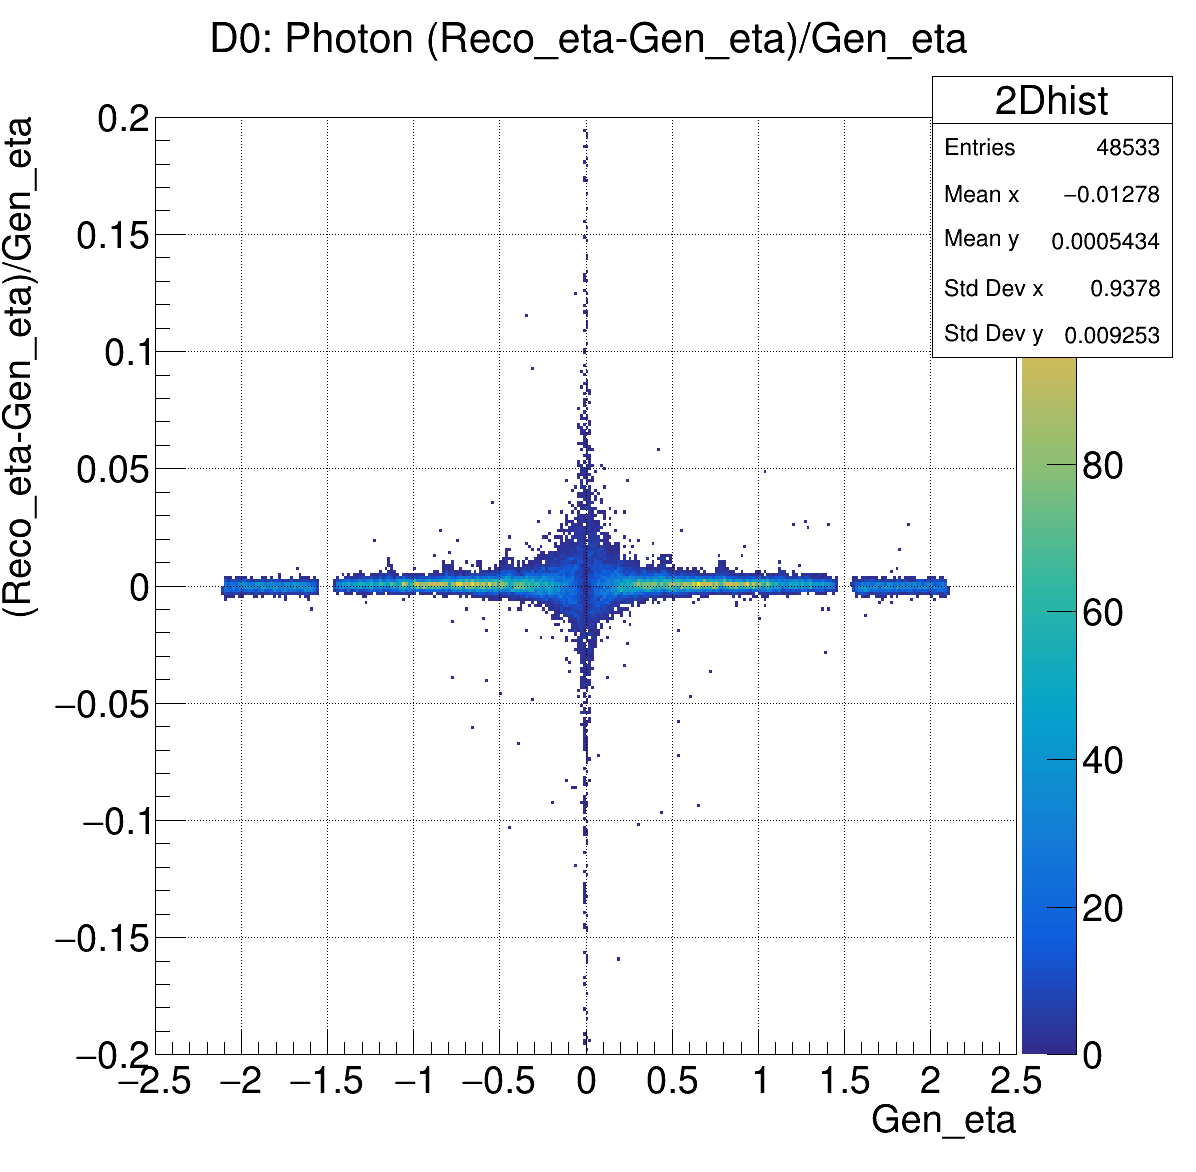

In [47]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 1200)

nbins, xlow, xhigh, ylow, yhigh = 300, -2.5, 2.5, -0.2, 0.2

var = "eta"
part = "Photon"

h = dfnew.Histo2D(("2Dhist", "D0: {0} (Reco_{1}-Gen_{1})/Gen_{1}".format(part, var),\
                   nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_Gen_{}".format(part, var), "Diff_{}_{}".format(part, var))

h.GetXaxis().SetTitle("Gen_{0}".format(var))
h.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h.GetZaxis().SetTitle("Events")
canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)

h.SetContour(100)
h.Draw("colz")
canvas.SetGrid()

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


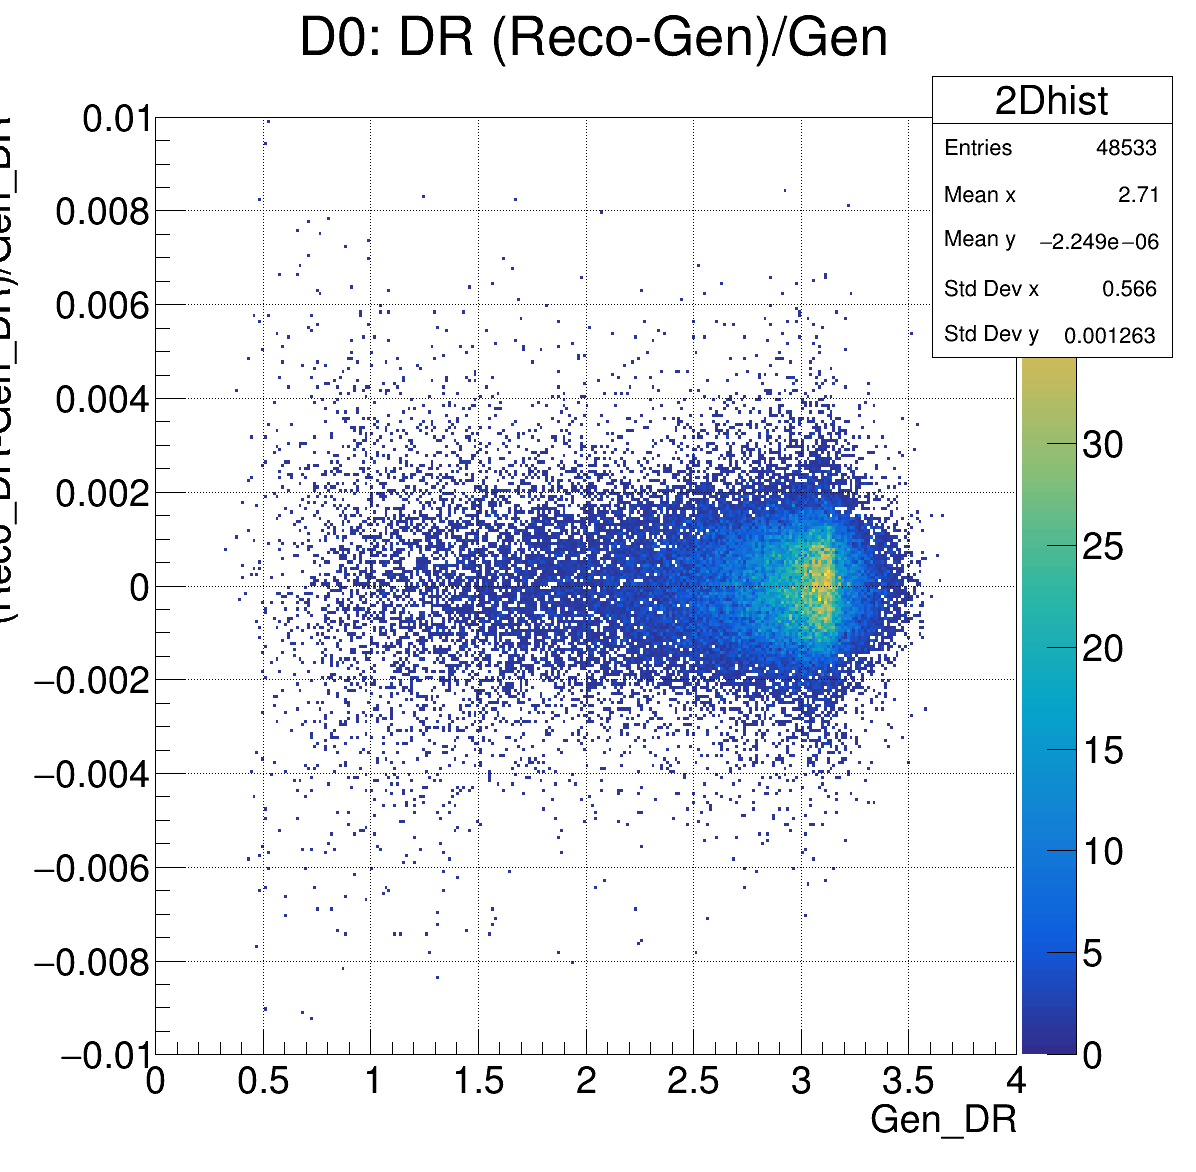

In [52]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 1200)

nbins, xlow, xhigh, ylow, yhigh = 300, 0, 4, -0.01, 0.01

part = "DR"

h = dfnew.Histo2D(("2Dhist", "D0: {0} (Reco-Gen)/Gen".format(part),\
                   nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_Gen".format(part), "Diff_{}".format(part))

h.GetXaxis().SetTitle("Gen_{0}".format(part))
h.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(part))
h.GetZaxis().SetTitle("Events")
canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)

h.SetContour(100)
h.Draw("colz")
canvas.SetGrid()

canvas.Draw()

In [8]:
cols = ["D0GenPT", "goodMeson_pt", "D0GenPhi", "goodMeson_phi", "DRGen", "DRReco"]

x = df.AsNumpy(columns=cols)

pddf = pd.DataFrame(x)

display(pddf)

,D0GenPT,goodMeson_pt,D0GenPhi,goodMeson_phi,DRGen,DRReco
0,50.250,[50.534969329833984],-0.998047,[-0.9990166425704956],2.623519,2.622015
1,55.375,[55.5338249206543],-1.554688,[-1.5554280281066895],2.508780,2.509825
2,60.125,[59.57328796386719],0.323242,[0.3233294188976288],3.092232,3.095670
3,57.875,[58.642616271972656],-0.383789,[-0.38442569971084595],2.786611,2.782540
4,52.375,[53.2285041809082],-0.853516,[-0.8527862429618835],3.047467,3.049812
...,...,...,...,...,...,...
48528,46.875,[47.87453079223633],-0.794922,[-0.7940106391906738],3.383874,3.384829
48529,61.375,[61.04192352294922],1.050781,[1.0495117902755737],3.027676,3.027740
48530,47.250,[47.360042572021484],-1.839844,[-1.8398098945617676],3.067405,3.067483
48531,95.250,[94.61052703857422],-2.765625,[-2.767314910888672],3.024120,3.025563


In [27]:
ptgen = np.array([x for x in pddf["D0GenPT"].tolist()])
ptreco = np.array([x[0] for x in pddf["goodMeson_pt"].tolist()])
print(ptgen, len(ptgen))
print(ptreco, len(ptreco))

[ 61.625 215.     61.875 ...  65.    127.     61.25 ] 16922
[ 61.59715652 213.74256897  61.06000137 ...  65.28115845 126.67811584
  61.01682281] 16922


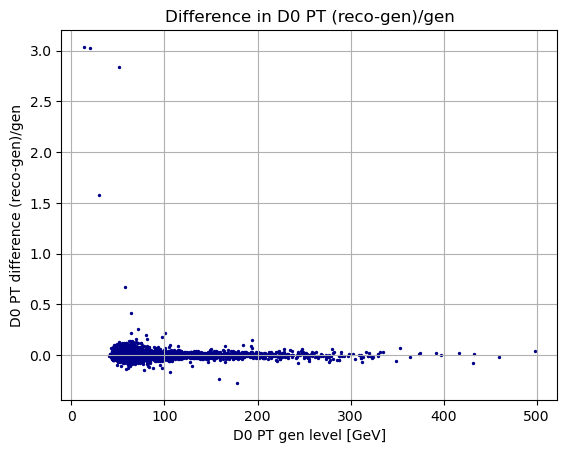

0.04122028298981575 2.0727763221032767


In [28]:
plt.scatter(ptgen, (ptreco-ptgen)/ptgen, s=2, color = "#000088")
plt.title("Difference in D0 PT (reco-gen)/gen")
plt.xlabel("D0 PT gen level [GeV]")
plt.ylabel("D0 PT difference (reco-gen)/gen")
plt.grid()
plt.show()
print(np.mean(ptreco-ptgen), np.std(ptreco-ptgen))